# **Email Spam Detection with Machine Learning**

In [21]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

In [2]:
# Import the required dataset
df_spam = pd.read_csv(r'D:\Intellipaat\Datasets\Spam.csv', encoding='ISO-8859-1')
df_spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Exploratory Data Analysis

In [3]:
df_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
# Remove the unwanted columns
df_spam.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df_spam.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Rename the remaining columns
df_spam.rename(columns={'v1' : 'spam', 'v2' : 'email'}, inplace=True)
df_spam.head()

,spam,email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Diplay the number of rows and columns
print(f'Total number of rows :- {df_spam.shape[0]}')
print(f'Total number of columns :- {df_spam.shape[1]}')

Total number of rows :- 5572
Total number of columns :- 2


In [7]:
# Label encoding
encoder = LabelEncoder()

df_spam['spam'] = encoder.fit_transform(df_spam['spam'])
df_spam.head()

,spam,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# Display the non-spam email
df_spam[df_spam['spam'] == 0]

,spam,email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
5565,0,Huh y lei...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [9]:
# Check the count of duplicates.
df_spam.duplicated().sum()

403

In [10]:
# Remove the duplicates.
df_spam.drop_duplicates(inplace=True)

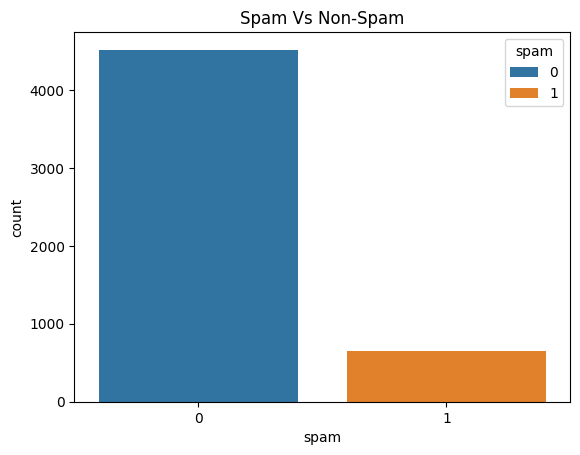

In [11]:
# Display the distribution of spam and non-spam messages.
sns.countplot(data=df_spam, x='spam', hue='spam')
plt.title('Spam Vs Non-Spam')
plt.show() 

In [12]:
# Apply count vectorizer to email dataset
vectorizer = CountVectorizer()
vectorizer_input_data = vectorizer.fit_transform(df_spam['email'])

In [13]:
# Display some words seperated by vectorizer
vectorizer.get_feature_names_out()[5000 : 5500]

array(['met', 'method', 'mf', 'mfl', 'mgs', 'mi', 'mia', 'michael', 'mid',
       'middle', 'midnight', 'mids', 'might', 'miiiiiiissssssssss',
       'mike', 'mila', 'mileage', 'miles', 'milk', 'millers', 'million',
       'millions', 'milta', 'min', 'mina', 'minapn', 'mind', 'minded',
       'mindset', 'mine', 'minecraft', 'mini', 'minimum', 'minmobsmore',
       'minmobsmorelkpobox177hp51fl', 'minmoremobsemspobox45po139wa',
       'minnaminunginte', 'minor', 'mins', 'mint', 'minus', 'minute',
       'minutes', 'minuts', 'miracle', 'mirror', 'mis', 'misbehaved',
       'miserable', 'misfits', 'mising', 'misplaced', 'miss', 'misscall',
       'missed', 'missin', 'missing', 'missionary', 'missions', 'misss',
       'missunderstding', 'missy', 'mist', 'mistake', 'mistakes',
       'misundrstud', 'mite', 'mitsake', 'mittelschmertz', 'miwa', 'mix',
       'mj', 'mjzgroup', 'mk45', 'ml', 'mm', 'mmm', 'mmmm', 'mmmmm',
       'mmmmmm', 'mmmmmmm', 'mmsto', 'mns', 'mnth', 'mnths', 'mo', 'moan',

## Model Building 

In [14]:
# Initialize independent and dependent variables
X = vectorizer_input_data
y = df_spam['spam']

In [15]:
# Split the data into training and testing with train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize Multinomial Naive Bayes model
model_nb = MultinomialNB()

In [17]:
# Train the model
model_nb.fit(X_train, y_train)

MultinomialNB()

In [18]:
# Predict the output with model
y_pred = model_nb.predict(X_test)

In [19]:
# Check the accuracy of model
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy of model is {round(acc * 100, 2)}')

Accuracy of model is 98.26


In [20]:
# Check the roc auc score of model
roc = roc_auc_score(y_test, y_pred)
print(f'Roc-Auc score of model is {round(roc * 100, 2)}')

Roc-Auc score of model is 96.39


In [22]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       889
           1       0.94      0.94      0.94       145

    accuracy                           0.98      1034
   macro avg       0.96      0.96      0.96      1034
weighted avg       0.98      0.98      0.98      1034

